In [10]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
import os
import matplotlib.pyplot as plt

In [11]:
# Define constants
IMAGE_WIDTH, IMAGE_HEIGHT = 64, 64
BATCH_SIZE = 32
NUM_CLASSES = 10
NUM_EPOCHS = 100
PATIENCE = 5

In [12]:
# Define directory containing images
data_dir = '/media/official-biswadeb941/Biswadeb/Programming_Projects/Python_Projects/Mayabati/data/input/Images'

In [13]:
# Define CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

In [14]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Set up data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)


In [16]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation')

Found 160 images belonging to 10 classes.
Found 40 images belonging to 10 classes.


In [17]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=PATIENCE, verbose=1)


In [18]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    callbacks=[early_stopping]
)

Epoch 1/100
5/5 [==============================] - 5s 914ms/step - loss: 2.3940 - accuracy: 0.1187 - val_loss: 2.2735 - val_accuracy: 0.0938
Epoch 2/100
5/5 [==============================] - 3s 621ms/step - loss: 2.2516 - accuracy: 0.1437 - val_loss: 2.2195 - val_accuracy: 0.2188
Epoch 3/100
5/5 [==============================] - 3s 592ms/step - loss: 2.1547 - accuracy: 0.2313 - val_loss: 2.1481 - val_accuracy: 0.2188
Epoch 4/100
5/5 [==============================] - 3s 611ms/step - loss: 1.9639 - accuracy: 0.3250 - val_loss: 1.9610 - val_accuracy: 0.2500
Epoch 5/100
5/5 [==============================] - 3s 590ms/step - loss: 1.7028 - accuracy: 0.5000 - val_loss: 1.8245 - val_accuracy: 0.3438
Epoch 6/100
5/5 [==============================] - 3s 582ms/step - loss: 1.4389 - accuracy: 0.5875 - val_loss: 1.7765 - val_accuracy: 0.2812
Epoch 7/100
5/5 [==============================] - 3s 591ms/step - loss: 1.2146 - accuracy: 0.6438 - val_loss: 1.8855 - val_accuracy: 0.2500
Epoch 8/100
5

In [19]:
# Save the trained model
model.save('/media/official-biswadeb941/Biswadeb/Programming_Projects/Python_Projects/Mayabati/data/output/Image_Model/Image.model')

/home/official-biswadeb941/.local/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


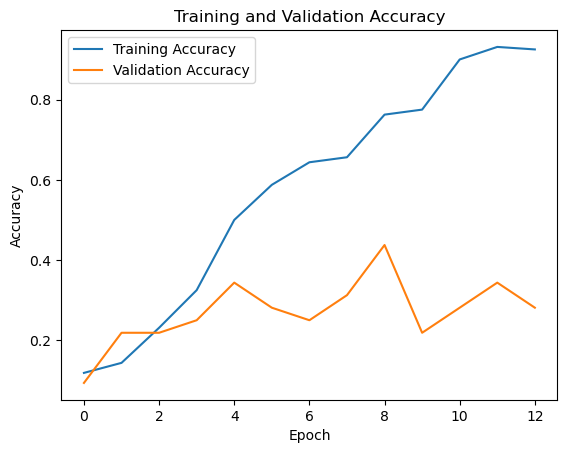

In [20]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

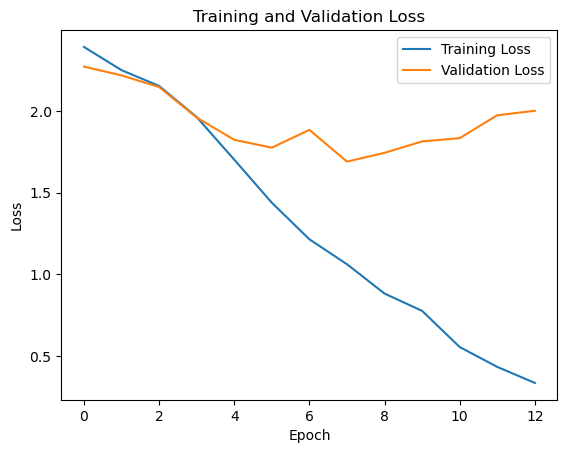

In [21]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()